# Disclaimer

This is a **practice notebook** that I did as a way to refresh myself with ``numpy``, ``pandas``, and ``scipy.stats``. This is in **NO WAY A VALID STUDY**. The dataset was downloaded from Kaggle and as created by [ruslankl](https://www.kaggle.com/datasets/ruslankl/european-union-lgbt-survey-2012). Methodology of the said survey is found [here](https://fra.europa.eu/sites/default/files/eu-lgbt-survey-technical-report_en.pdf). Again, this entire notebook is **NO WAY A VALID STUDY**. This was msostly done for personal practice and upskilling.

# Introduction

![Demonstrators waved rainbow and EU flags](https://ichef.bbci.co.uk/news/976/cpsprodpb/11C15/production/_89952727_89952694.jpg.webp)

The LGBTQIA+ community continues to fight for their rights across parts of the world as it affects aspects of their lives. From Healthcare to Marriage, these sectors do not cater to the community at large. An unspoken aspect of queer and trans lives that is not spoken about is Employment. Many queer and trans people face discrimination in their lives. This is not new to countries inside the European Union (EU). Hence, this data report examined the following questions:

1. Is there any legal provision providing safety against discrimination in Employment for the LGBTQIA+ community within the EU?
2. Are the responses of the respondents correlated to their subset within the LGBTQIA+ community within the EU?
3. Are the responses of the respondents correlated to their country of origin within the EU?

# Dataset and Libraries used

The main language used to analyze the data is Python. Using the libraries ``numpy``, ``pandas``, and ``matplotlib.pyplot``, the writer can get a descriptive analysis of the dataset ``LGBT_Survey_RightsAwareness.csv``. Likewise, the ``researchpy`` library and the ``scipy.stats`` library were imported to gather an inferential analysis of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats

df = pd.read_csv("LGBT_Survey_RightsAwareness.csv")

df

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Yes,53,NaN
1,Austria,Lesbian,d1,"In the country where you live, is there a law ...",No,10,NaN
2,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Don`t know,37,NaN
3,Austria,Gay,d1,"In the country where you live, is there a law ...",Yes,45,NaN
4,Austria,Gay,d1,"In the country where you live, is there a law ...",No,16,NaN
...,...,...,...,...,...,...,...
3765,Average,Bisexual men,d5,"As far as you know, can same-sex couples legal...",No,35,NaN
3766,Average,Bisexual men,d5,"As far as you know, can same-sex couples legal...",Don`t know,4,NaN
3767,Average,Transgender,d5,"As far as you know, can same-sex couples legal...",Yes,62,NaN
3768,Average,Transgender,d5,"As far as you know, can same-sex couples legal...",No,35,NaN


# Survey Questionnaire

The following is the complete questionnaire sent to the respondents. 

In [2]:
questions = df.loc[:, 'question_label']
q_uni = questions.unique()

print(q_uni)

['In the country where you live, is there a law that forbids discrimination against persons because of their sexual orientation when applying for a job?'
 'In the country where you live, is there a law that forbids discrimination against persons because of their gender identity when applying for a job?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Lesbian?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Gay?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Bisexual?'
 'Do you know of any organisation in the country where you live that can offer support or advice to people who have been discriminated against because they are Transgender?'
 'In the count

For brevity of this report, the writer has only focused on the first two questions (tagged as `d1` and `d2` in the dataset).

# Demographic of the Sample

The following are the demographics of the population based on their subsets within the LGBTQIA+ community.

Lesbian           87
Gay               87
Bisexual women    87
Bisexual men      87
Transgender       87
Name: subset, dtype: int64


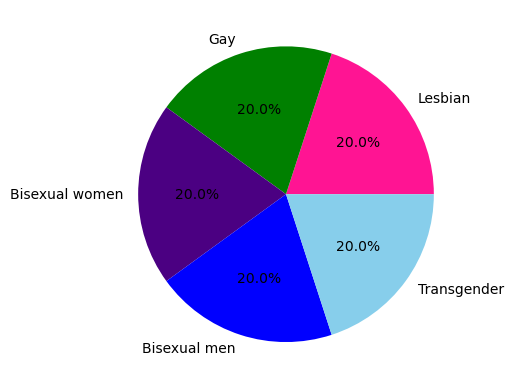

In [10]:
comm_df = df.loc[df['question_code'] == 'd1']
comm_x = comm_df.loc[:,'subset'].unique()
comm_y = comm_df.loc[:,'subset'].value_counts()
comm_colors = ["deeppink","g","indigo","blue","skyblue"]

def comm_pie():
    plt.pie(comm_y, labels=comm_x, autopct='%1.1f%%', colors=comm_colors)

print(comm_y)
comm_pie()

The following are the countries of origin of the population.

Austria           15
Italy             15
United Kingdom    15
Slovakia          15
Slovenia          15
Sweden            15
Romania           15
Portugal          15
Poland            15
Netherlands       15
Malta             15
Latvia            15
Luxembourg        15
Lithuania         15
Ireland           15
Belgium           15
Hungary           15
Croatia           15
France            15
Finland           15
Spain             15
Greece            15
Estonia           15
Denmark           15
Germany           15
Czech Republic    15
Cyprus            15
Bulgaria          15
Average           15
Name: CountryCode, dtype: int64


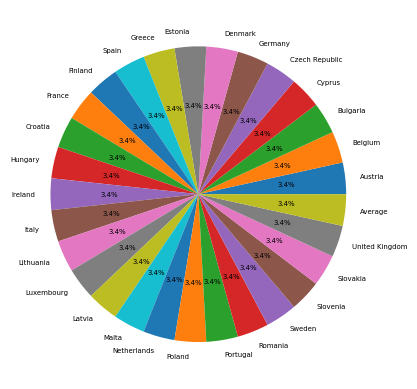

In [4]:
country_df = df.loc[df['question_code'] == 'd1']
country_x = country_df.loc[:,'CountryCode'].unique()
country_y = country_df.loc[:,'CountryCode'].value_counts()

def country_pie():
    plt.pie(country_y, labels=country_x, autopct='%1.1f%%', textprops={'fontsize': 5})

print(country_y)
country_pie()

For an accuracy of the data results, the dataframe will take a sample from the dataset using the ``.sample()`` function. Using Slovin's formula, we have determined that a sample size of $208$ shall be used for the study

In [70]:
#Sample Size using Slovin's Formula

def n() :
    pop = comm_df.loc[:,'CountryCode'].value_counts().sum()
    moe = 0.05
    moe2 = moe**2
    den = 1+(pop*moe2) #Short for denominator
    slovin = pop/den
    print(round(slovin))
   
n()

208


# On Workplace Discrimination

When asked if they knew about any laws that forbids discrimination against persons because of their sexual orientation when applying for a job, this is the response of the respondents:

Yes           73
Don`t know    73
No            62
Name: answer, dtype: int64


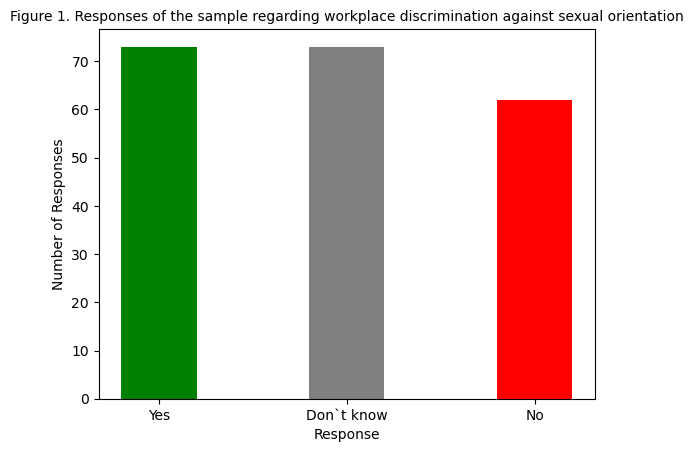

In [79]:
job_disc_2 = df.loc[df['question_code'] == 'd1'].sample(n=208, random_state=1)
job_disc_a2 = job_disc_2.loc[:,'answer'].value_counts()
job_disc_l2 = job_disc_2.loc[:,'answer'].unique()
colors = ["Green", "Grey", "Red"]

def job_disc1() :
    plt.title("Figure 1. Responses of the sample regarding workplace discrimination against sexual orientation",
              fontsize=10)
    plt.bar(job_disc_l2, job_disc_a2, color=colors, width=0.4)
    plt.xlabel("Responses", fontsize=10)
    plt.ylabel("Number of Responses", fontsize=10)
    plt.show()
    
print(job_disc_a2)
job_disc1()

When asked about laws that forbids discrimination against persons because of their gender identity when applying for a job, this is the response of the respondents:

Yes           73
Don`t know    73
No            62
Name: answer, dtype: int64


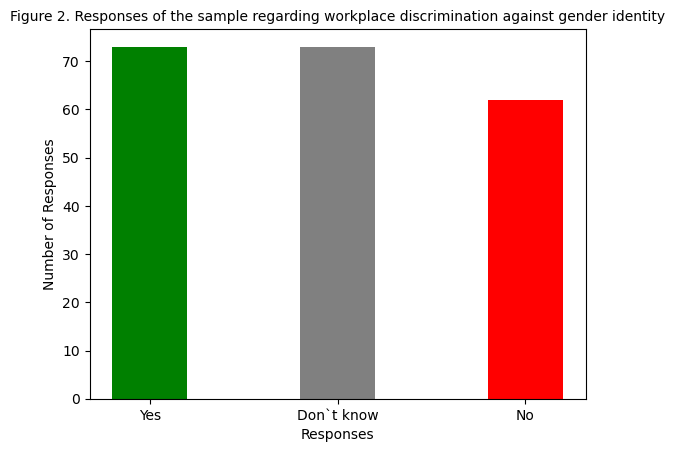

In [80]:
job_disc_3 = df.loc[df['question_code'] == 'd2'].sample(n=208, random_state=1)
job_disc_a3 = job_disc_3.loc[:,'answer'].value_counts()
job_disc_l3 = job_disc_3.loc[:,'answer'].unique()
colors = ["Green", "Grey", "Red"]

def job_disc2() :
    plt.title("Figure 2. Responses of the sample regarding workplace discrimination against gender identity",
              fontsize=10)
    plt.bar(job_disc_l3, job_disc_a3, color=colors, width=0.4)
    plt.xlabel("Responses", fontsize=10)
    plt.ylabel("Number of Responses", fontsize=10)
    plt.show()
    
print(job_disc_a3)
job_disc2()

# Correlation with Subset within LGBTQIA+ Community

After performing a cross-tabulation of the ``subset`` with the ``answer`` column of the dataframe (filtered only to answers under the question code `d1`), the writer has performed a Chi-Square test of Independence.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their subset within the LGBTQIA+ community.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their subset within the LGBTQIA+ community.
<br>
$p-value = 0.05$

In [68]:
job_disc_2 = df.loc[df['question_code'] == 'd1'].sample(n=208, random_state=1)
ctab1 = pd.crosstab(job_disc_2.subset, job_disc_2.answer)
ctab1_cs = stats.chi2_contingency(ctab1)

print(ctab1)
print(" ")
print(ctab1_cs)

answer          Don`t know  No  Yes
subset                             
Bisexual men            14  11   14
Bisexual women          13  14   15
Gay                     14  14   14
Lesbian                 17  10   13
Transgender             15  13   17
 
Chi2ContingencyResult(statistic=1.8391431517370533, pvalue=0.9855522970881436, dof=8, expected_freq=array([[13.6875    , 11.625     , 13.6875    ],
       [14.74038462, 12.51923077, 14.74038462],
       [14.74038462, 12.51923077, 14.74038462],
       [14.03846154, 11.92307692, 14.03846154],
       [15.79326923, 13.41346154, 15.79326923]]))


As findings show that the responses in `d1` have a $p-value$ of $0.98$, the null hypothesis is not rejected. However, while there is no statistical correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their subset withing the LGBTQIA+ community, this does not mean that the alternative hypothesis is true.

We then performed a cross-tabulation of the ``subset`` with the ``answer`` column of the dataframe filtered only to answers under the question code `d2` and performed the same procedures.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their subset within the LGBTQIA+ community.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their subset within the LGBTQIA+ community.
<br>
$p-value = 0.05$

In [71]:
job_disc_3 = df.loc[df['question_code'] == 'd2'].sample(n=208, random_state=1)
ctab2 = pd.crosstab(job_disc_3.subset, job_disc_3.answer)
ctab2_cs = stats.chi2_contingency(ctab1)

print(ctab2)
print(" ")
print(ctab2_cs)

answer          Don`t know  No  Yes
subset                             
Bisexual men            14  11   14
Bisexual women          13  14   15
Gay                     14  14   14
Lesbian                 17  10   13
Transgender             15  13   17
 
Chi2ContingencyResult(statistic=1.8391431517370533, pvalue=0.9855522970881436, dof=8, expected_freq=array([[13.6875    , 11.625     , 13.6875    ],
       [14.74038462, 12.51923077, 14.74038462],
       [14.74038462, 12.51923077, 14.74038462],
       [14.03846154, 11.92307692, 14.03846154],
       [15.79326923, 13.41346154, 15.79326923]]))


As findings show that the responses in `d2` have a $p-value$ of $0.98$, the null hypothesis is thus not rejected. However, while there is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their subset withing the LGBTQIA+ community, this does not mean that the alternative hypothesis is true.

# Correlation with Country of Origin

After performing a cross-tabulation of the ``CountryCode`` with the ``answer`` column of the dataframe (filtered only to answers under the question code `d1`), the writer has performed a Chi-Square test of Independence.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their country of origin.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their country of origin.
<br>
$p-value = 0.05$

In [72]:
job_disc_2 = df.loc[df['question_code'] == 'd1'].sample(n=208, random_state=1)
ctab1a = pd.crosstab(job_disc_2.CountryCode, job_disc_2.answer)
ctab1a_cs = stats.chi2_contingency(ctab1a)

print(ctab1a)
print(" ")
print(ctab1a_cs)

answer          Don`t know  No  Yes
CountryCode                        
Austria                  3   2    4
Average                  3   3    2
Belgium                  3   1    2
Bulgaria                 2   1    2
Croatia                  2   1    4
Cyprus                   2   2    1
Czech Republic           2   4    2
Denmark                  4   1    3
Estonia                  2   2    3
Finland                  2   3    3
France                   3   1    4
Germany                  2   3    2
Greece                   4   2    3
Hungary                  2   1    3
Ireland                  3   2    1
Italy                    3   3    2
Latvia                   3   3    2
Lithuania                2   2    2
Luxembourg               2   1    3
Malta                    3   5    2
Netherlands              2   3    5
Poland                   3   2    2
Portugal                 2   4    2
Romania                  3   1    4
Slovakia                 0   3    0
Slovenia                 4  

As findings show that the responses in `d1` have a $p-value$ of $0.99$, the null hypothesis is thus not rejected. However, while there is a correlation between the perception of the respondents regarding laws protecting discrimination against their sexual orientation and their country of origin, this does not mean that the alternative hypothesis is true.

We then performed a cross-tabulation of the ``CountryCode`` with the ``answer`` column of the dataframe filtered only to answers under the question code `d2` and performed the same procedures.

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their country of origin.
<br>
$H_{a}$ = There is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their country of origin.
<br>
$p-value = 0.05$

In [73]:
job_disc_3 = df.loc[df['question_code'] == 'd2'].sample(n=208, random_state=1)
ctab2a = pd.crosstab(job_disc_3.CountryCode, job_disc_3.answer)
ctab2a_cs = stats.chi2_contingency(ctab2a)

print(ctab2a)
print(" ")
print(ctab2a_cs)

answer          Don`t know  No  Yes
CountryCode                        
Austria                  3   2    4
Average                  3   3    2
Belgium                  3   1    2
Bulgaria                 2   1    2
Croatia                  2   1    4
Cyprus                   2   2    1
Czech Republic           2   4    2
Denmark                  4   1    3
Estonia                  2   2    3
Finland                  2   3    3
France                   3   1    4
Germany                  2   3    2
Greece                   4   2    3
Hungary                  2   1    3
Ireland                  3   2    1
Italy                    3   3    2
Latvia                   3   3    2
Lithuania                2   2    2
Luxembourg               2   1    3
Malta                    3   5    2
Netherlands              2   3    5
Poland                   3   2    2
Portugal                 2   4    2
Romania                  3   1    4
Slovakia                 0   3    0
Slovenia                 4  

As findings show that the responses in `d2` have a $p-value$ of $0.99$, the null hypothesis is not rejected. However, while there is a correlation between the perception of the respondents regarding laws protecting discrimination against their gender identity and their country of origin, this does not mean that the alternative hypothesis is true.

# Conclusion

Selected LGBTQIA+ residents within the EU have expressed that there is legal protection for them when it comes to the workplace discrimination against both sexual orientation and gender identity. However, these perceptions were not influenced depending on their subset within the LGBTQIA+ community and their country of origin.